# Importing the Required Directories

In [345]:
#Importing Libraries for Analysis
import numpy as np
import pandas as pd
#Importing Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#Importing Libraries for Preprocessing
from sklearn.preprocessing import StandardScaler
#Importing Libraries for Model Selection
from sklearn.model_selection import train_test_split
# Importing the Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix

In [120]:
import warnings
warnings.filterwarnings('ignore')

# Importing the Required Directories

In [121]:
#Accessing the Dataset
final_df=pd.read_csv('water_potability.csv')

In [122]:
#Look of the Dataset
final_df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [123]:
#Shape of the Dataset
final_df.shape

(3276, 10)

**Observation:**
* The Following Dataset contains 3276 rows and 10 columns.

In [124]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [125]:
#Statistical Analysis
final_df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [126]:
#Checking the Null values of each column
final_df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

**Observation**
* Three columns are there that have Null values.
* The column names are ph,Sulfate and Trihalomethanes

# Exploratory Data Analysis

In [127]:
#Analyzing the Potability column
final_df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [128]:
#Visualizing the Potability column
fig=px.pie(final_df,values=final_df['Potability'].value_counts(),
          names=[0,1],
          title='<b>Potability Percentage',
          hole=0.4,
          color_discrete_sequence=px.colors.qualitative.Pastel,
          template='plotly_dark')
fig.update_layout(title_font_size=30)
fig.show()

**Potablity:** If Water safe for Drinking
* Potable---> 1(Water safe for Drinking)
* Not Potable--->0(Water not safe for Drinking)

**Observation**
* 61% of Water is not safe for Drinking and 39% is safe for Drinking

In [129]:
#Analyzing the ph feature
fig=px.histogram(final_df,x="ph",nbins=40,color_discrete_sequence=["#ffff00"],title="<b>PH Distribution",text_auto=True)
fig.update_layout(template="plotly_dark" )

fig.show()

**Observation**
* The PH is Normally Distributed.

In [131]:
#Checking the Outliers in ph feature using 3-Standard Deviation method
upper=final_df['ph'].mean() + 3*final_df['ph'].std()
lower=final_df['ph'].mean() - 3*final_df['ph'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper,lower))

Upper Limit is 11.863753060403255 and Lower Limit is 2.297835948150383


**Observation:**
* The Upper Limit of ph distribution is 11.86
* The Lower Limit of ph distribution is 2.29

**Insight:**
* This will help me to remove the Outliers.

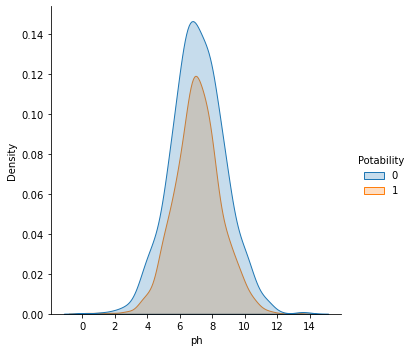

In [132]:
# Bivariate Analysis of ph with Potability

sns.displot(x=final_df['ph'],hue=final_df['Potability'],kind='kde',fill=True)

**Observation:**
* The Distribution of ph related to Potability is almost same.
* The Not Potable Water has more Ph level than of Potable Water.

In [133]:
# Analyzing the Hardness of the Water
fig=px.histogram(final_df,x="Hardness",nbins=40,color_discrete_sequence=["#80ffff"],title="<b>Hardness Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

**Observation:**
* The Hardness is Normally Distributed.

In [134]:
#Checking the Outliers in Hardness feature using 3-Standard Deviation method
upper_har=final_df['Hardness'].mean() + 3*final_df['Hardness'].std()
lower_har=final_df['Hardness'].mean() - 3*final_df['Hardness'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_har,lower_har))

Upper Limit is 295.00878044618435 and Lower Limit is 97.73021158841922


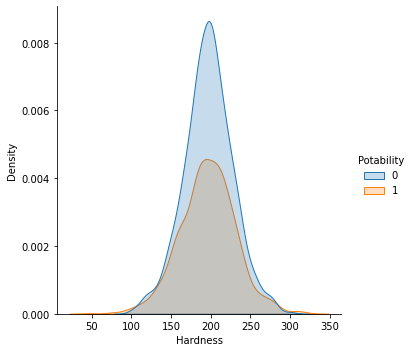

In [16]:
# Bivariate Analysis of Hardness with Potability

sns.displot(x=final_df['Hardness'],hue=final_df['Potability'],kind='kde',fill=True)

**Observation:**
* The Not Potable Water has more Hardness as compared to Potable Water.

In [135]:
fig=px.histogram(final_df,x="Solids",nbins=50,color_discrete_sequence=["#9999ff"],title="<b>Solids Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

In [136]:
#Checking the Outliers in Solids feature using 3-Standard Deviation method
upper_sol=final_df['Solids'].mean() + 3*final_df['Solids'].std()
lower_sol=final_df['Solids'].mean() - 3*final_df['Solids'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_sol,lower_sol))

Upper Limit is 48319.80500943491 and Lower Limit is -4291.619957280687


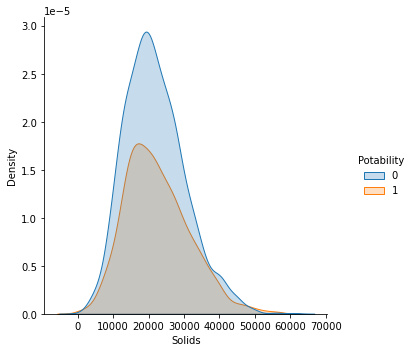

In [137]:
sns.displot(x=final_df['Solids'],hue=final_df['Potability'],kind='kde',fill=True)

In [138]:
# Analyzing the Chloramines of the Water
fig=px.histogram(final_df,x="Chloramines",nbins=40,color_discrete_sequence=["#99ff99"],title="<b>Chloramines Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

In [139]:
#Checking the Outliers in Chloramines feature using 3-Standard Deviation method
upper_chl=final_df['Chloramines'].mean() + 3*final_df['Chloramines'].std()
lower_chl=final_df['Chloramines'].mean() - 3*final_df['Chloramines'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_chl,lower_chl))

Upper Limit is 11.871531460544917 and Lower Limit is 2.3730221263066564


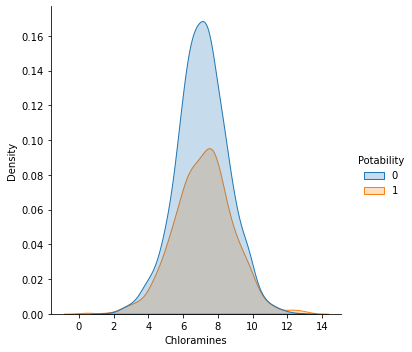

In [140]:
sns.displot(x=final_df['Chloramines'],hue=final_df['Potability'],kind='kde',fill=True)

In [141]:
# Analyzing the Sulfate of the Water
fig=px.histogram(final_df,x="Sulfate",nbins=40,color_discrete_sequence=["#ffd9b3"],title="<b>Sulfate Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

In [142]:
#Checking the Outliers in Sulfate feature using 3-Standard Deviation method
upper_sul=final_df['Sulfate'].mean() + 3*final_df['Sulfate'].std()
lower_sul=final_df['Sulfate'].mean() - 3*final_df['Sulfate'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_sul,lower_sul))

Upper Limit is 458.02629799583144 and Lower Limit is 209.52525522579535


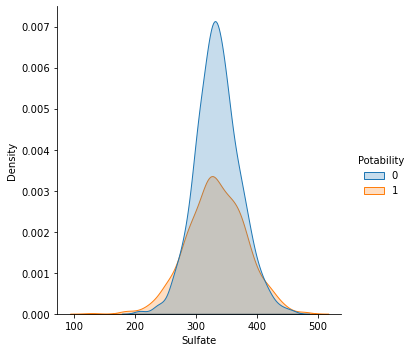

In [143]:
sns.displot(x=final_df['Sulfate'],hue=final_df['Potability'],kind='kde',fill=True)

In [144]:
# Analyzing the Conductivity of the Water
fig=px.histogram(final_df,x="Conductivity",nbins=40,color_discrete_sequence=["#f0b3ff"],title="<b>Conductivity Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

In [145]:
#Checking the Outliers in Conductivity feature using 3-Standard Deviation method
upper_cond=final_df['Conductivity'].mean() + 3*final_df['Conductivity'].std()
lower_cond=final_df['Conductivity'].mean() - 3*final_df['Conductivity'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_cond,lower_cond))

Upper Limit is 668.6773028358875 and Lower Limit is 183.73291852921665


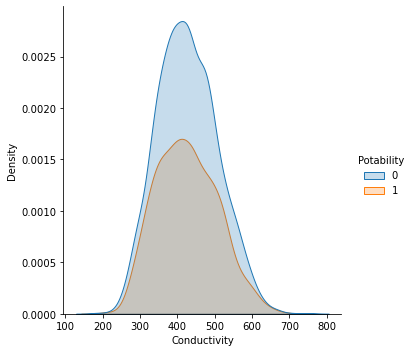

In [146]:
sns.displot(x=final_df['Conductivity'],hue=final_df['Potability'],kind='kde',fill=True)

In [147]:
# Analyzing the Organic_carbon of the Water
fig=px.histogram(final_df,x="Organic_carbon",nbins=40,color_discrete_sequence=["#ff99c2"],title="<b>Organic_carbon Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

In [148]:
#Checking the Outliers in Organic_carbon feature using 3-Standard Deviation method
upper_car=final_df['Organic_carbon'].mean() + 3*final_df['Organic_carbon'].std()
lower_car=final_df['Organic_carbon'].mean() - 3*final_df['Organic_carbon'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_car,lower_car))

Upper Limit is 24.20945624505794 and Lower Limit is 4.360484250296732


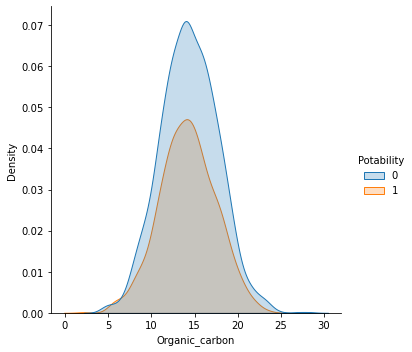

In [149]:
sns.displot(x=final_df['Organic_carbon'],hue=final_df['Potability'],kind='kde',fill=True)

In [151]:

# Analyzing the Trihalomethanes of the Water
fig=px.histogram(final_df,x="Trihalomethanes",nbins=40,color_discrete_sequence=["#00b3b3"],title="<b>Trihalomethanes Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

In [152]:
#Checking the Outliers in Trihalomethanes feature using 3-Standard Deviation method
upper_tri=final_df["Trihalomethanes"].mean() + 3*final_df["Trihalomethanes"].std()
lower_tri=final_df["Trihalomethanes"].mean() - 3*final_df["Trihalomethanes"].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_tri,lower_tri))

Upper Limit is 114.92131821342397 and Lower Limit is 17.871267680112084


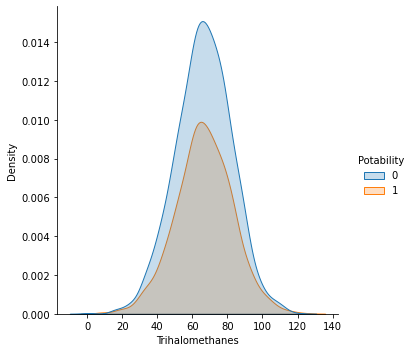

In [154]:
sns.displot(x=final_df['Trihalomethanes'],hue=final_df['Potability'],kind='kde',fill=True)

In [155]:

# Analyzing the Turbidity of the Water
fig=px.histogram(final_df,x="Turbidity",nbins=40,color_discrete_sequence=["#ffb366"],title="<b>Turbidity Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

In [156]:
#Checking the Outliers in Turbidity feature using 3-Standard Deviation method
upper_tur=final_df['Turbidity'].mean() + 3*final_df['Turbidity'].std()
lower_tur=final_df['Turbidity'].mean() - 3*final_df['Turbidity'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_tur,lower_tur))

Upper Limit is 6.307933395247293 and Lower Limit is 1.6256389443348227


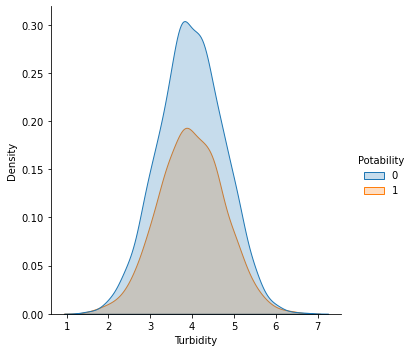

In [157]:
sns.displot(x=final_df['Turbidity'],hue=final_df['Potability'],kind='kde',fill=True)

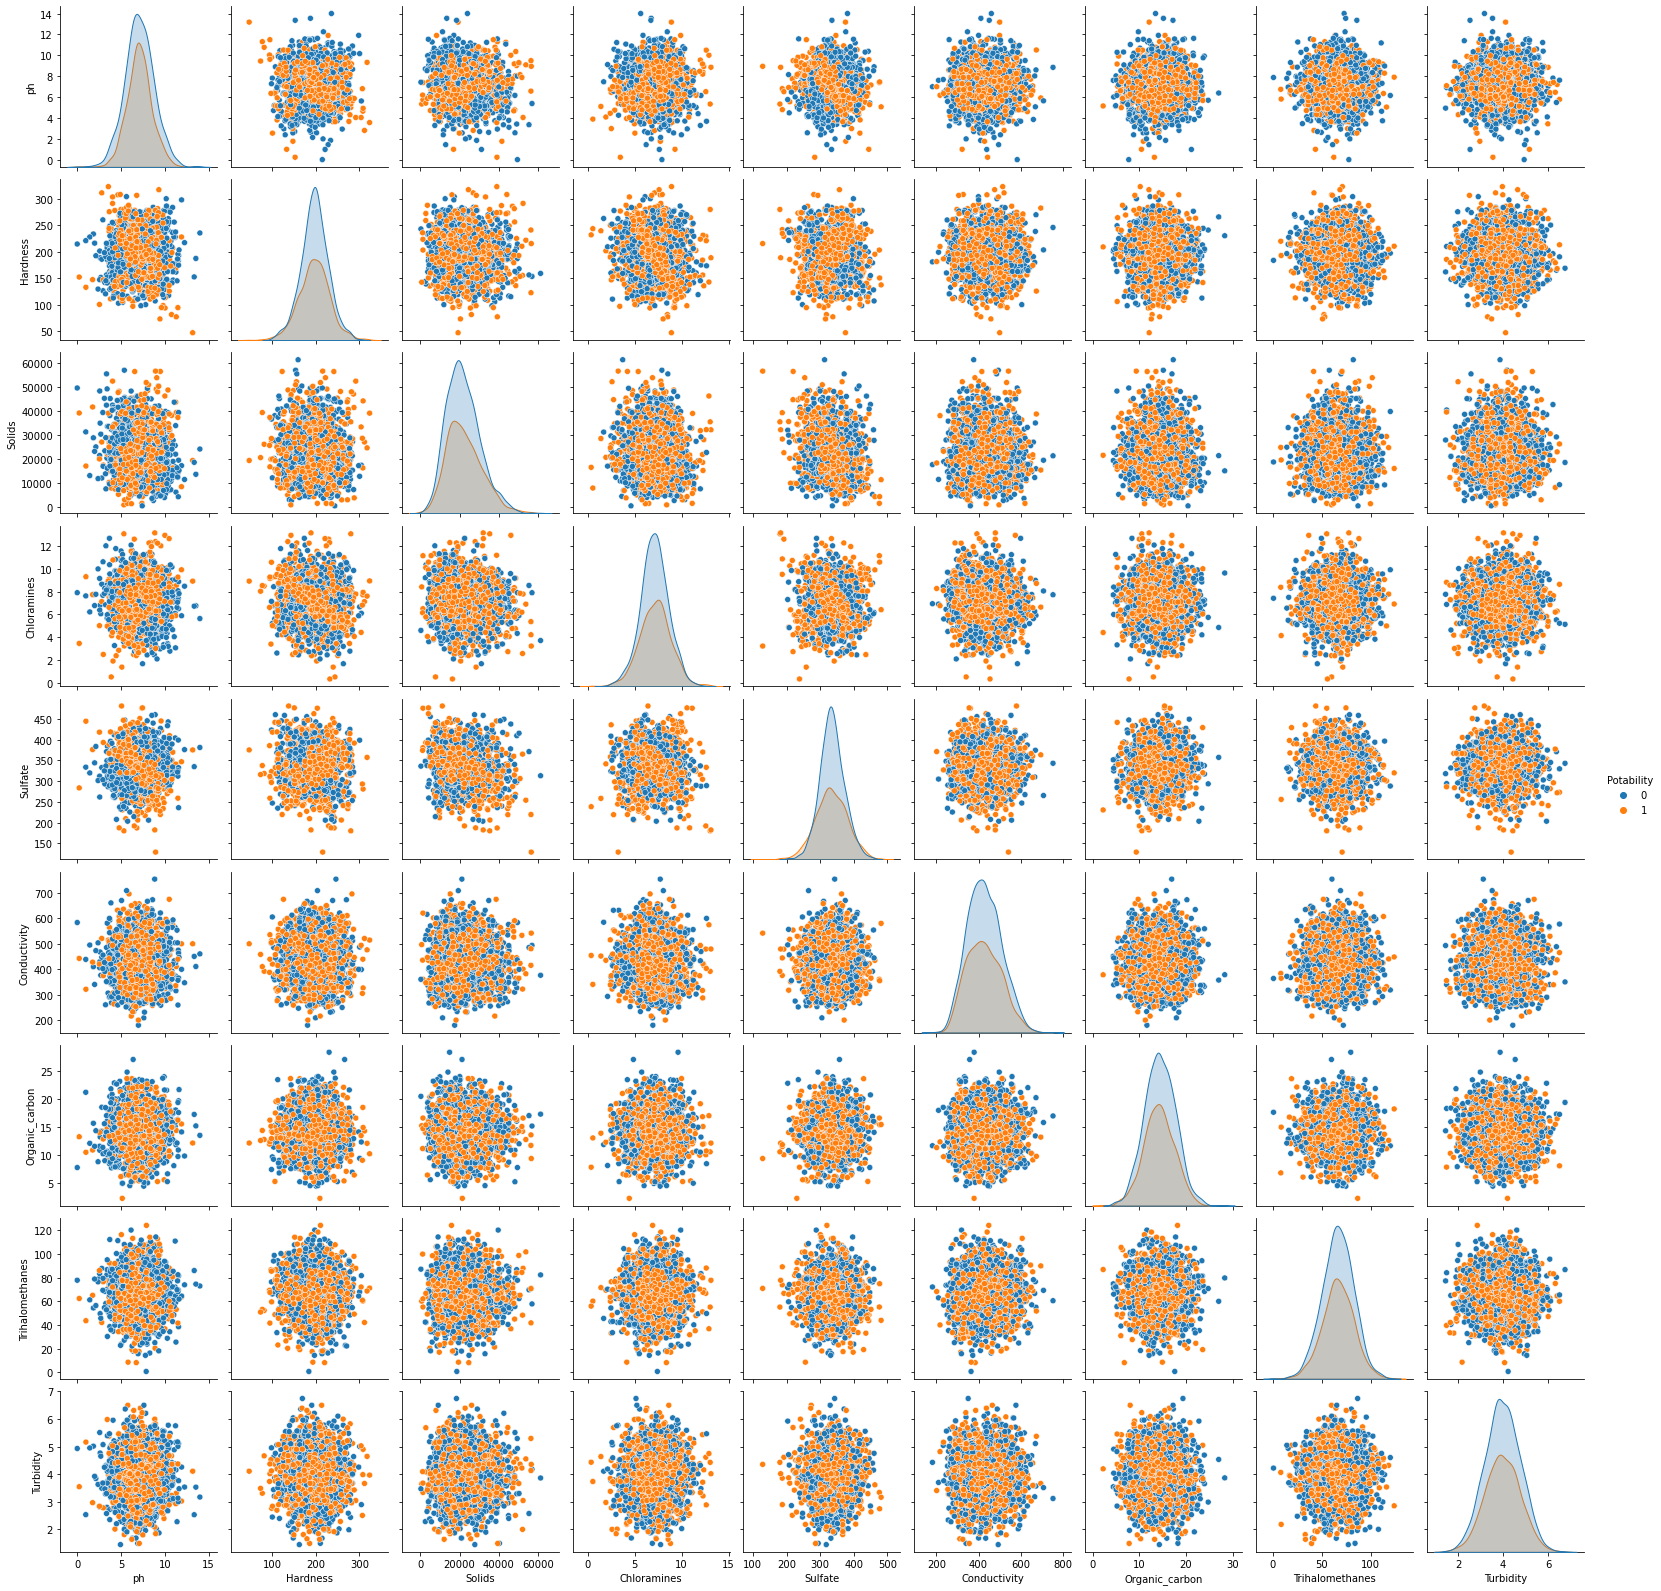

In [158]:
sns.pairplot(final_df,hue='Potability')

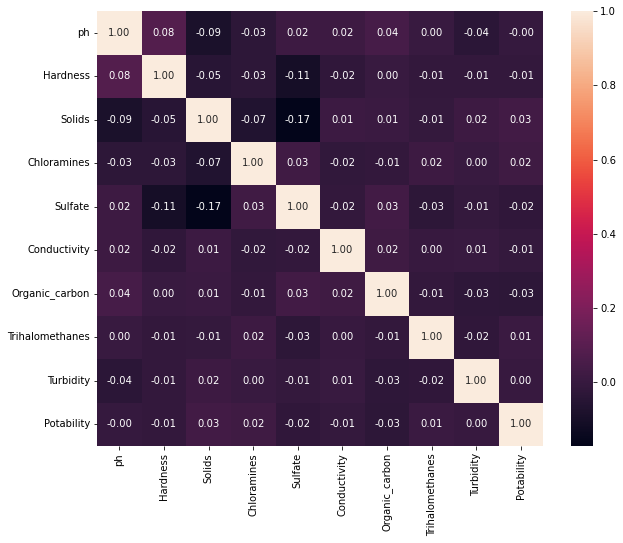

In [160]:
#Visualizing the Correlation Matrix of Features
plt.figure(figsize=(10,8))
sns.heatmap(final_df.corr(),annot=True,fmt='.2f')
plt.show()

**Observations:**
* All Features are Normally Distributed.
* Every Feature contains Few Outliers.
* Every Feature is not highly correlated with Potability Feature.

**Insights:**
* Remove all Outliers in order to improve the Accuracy of the Model.

# Feature Engineering

**Filling Missing Values**

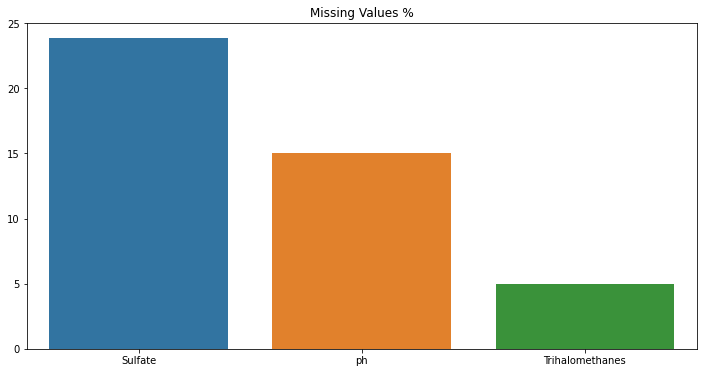

In [161]:
#Checking the Percentage of Missing Values
plt.figure(figsize=(12,6))
missing_values=round(final_df.isna().sum()*100/len(final_df),2)
missing_values=missing_values[missing_values>0]
missing_values.sort_values(inplace=True,ascending=False)
sns.barplot(x=missing_values.index,y=missing_values.values)
plt.title('Missing Values %')
plt.show()

In [162]:
#Filling the Missing Values with their Mean because Features are Normally Distributed.
#Sulfate_Mean
sulfate_mean=final_df[(final_df['Sulfate']>=lower_sul) &(final_df['Sulfate']<=upper_sul)]['Sulfate'].mean()
final_df['Sulfate'].fillna(sulfate_mean,inplace=True)
#ph Mean
ph_mean=final_df[(final_df['ph']>=lower) &(final_df['ph']<=upper)]['ph'].mean()
final_df['ph'].fillna(ph_mean,inplace=True)
#Trihalomethanes Mean
tri_mean=final_df[(final_df['Trihalomethanes']>=lower_tri) &(final_df['Trihalomethanes']<=upper_tri)]['Trihalomethanes'].mean()
final_df['Trihalomethanes'].fillna(tri_mean,inplace=True)

In [163]:
final_df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Data Cleaning

In [164]:
# #Removing the Outliers

final_df=final_df[(final_df['ph']>=lower) & (final_df['ph']<=upper)&
                  (final_df['Hardness']>=lower_har)&(final_df['Hardness']<=upper_har)&
                (final_df['Solids']>=lower_sol)&(final_df['Solids']<=upper_sol)&
                (final_df['Chloramines']>=lower_chl)&(final_df['Chloramines']<=upper_chl)&
                 (final_df['Sulfate']>=lower_sul)&(final_df['Sulfate']<=upper_sul)&
                 (final_df['Conductivity']>=lower_cond)&(final_df['Conductivity']<=upper_cond)&
                 (final_df['Organic_carbon']>=lower_car)&(final_df['Organic_carbon']<=upper_car) &
                 (final_df['Trihalomethanes']>=lower_tri)&(final_df['Trihalomethanes']<=upper_tri)&
                 (final_df['Turbidity']>=lower_tur)&(final_df['Turbidity']<=upper_tur)]

In [166]:
final_df.shape

(3161, 10)

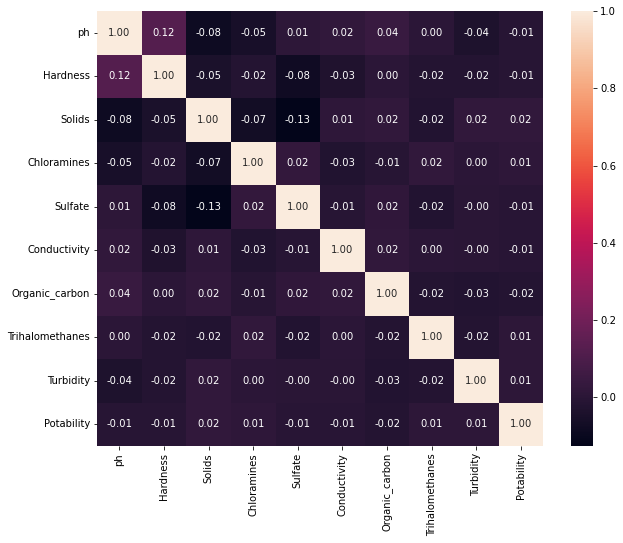

In [167]:
#Visualizing the Correlation Matrix of Features
plt.figure(figsize=(10,8))
sns.heatmap(final_df.corr(),annot=True,fmt='.2f')
plt.show()


# Splitting of Train and Test Data

In [313]:
X=final_df.drop('Potability',axis=1)
y=final_df['Potability']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [314]:
X_train.head()

ph    Hardness        Solids  Chloramines     Sulfate  \
1238   6.582500  200.733107  23720.481730     8.565832  353.008115   
715    7.085068  193.410141  14472.391549     5.640672  322.674462   
1137   8.722144  151.621132  28301.516949     3.651961  248.094759   
1162  11.244507  169.403655  43533.657845     5.888460  341.029600   
2598  10.199413  256.704338  28703.751140     7.940595  326.462666   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
1238    458.362733       13.001881        79.529338   4.152014  
715     431.457337       12.721922        92.758852   4.414819  
1137    468.367451       15.151173        79.538368   3.274629  
1162    336.446655       16.089710        59.494026   2.929953  
2598    552.162181        8.802847        66.467172   4.384868

In [315]:
X_test.head()

ph    Hardness        Solids  Chloramines     Sulfate  \
144   4.965774  220.848639  21802.744898     6.250578  311.598136   
904   5.949519  160.442631  16898.808297     6.045906  367.328542   
305   6.428866  225.613094  15596.473334     6.153472  334.085961   
1293  7.293929  180.843125  15823.339374     7.721977  334.085961   
632   7.085068  181.374651  14579.822073     5.435058  334.085961   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
144     386.413332       18.035238        53.908177   3.421767  
904     451.012788       16.359951        62.368234   4.072198  
305     466.044399       18.015385        87.163631   4.184783  
1293    457.520443        8.857599        37.734790   4.403250  
632     308.792515        9.545092        60.214647   4.161749

In [316]:
y_train.head()

1238    0
715     1
1137    1
1162    1
2598    0
Name: Potability, dtype: int64

In [317]:
#Shape of the X_train and X_test
print(X_train.shape,X_test.shape)

(2528, 9) (633, 9)


# Standardization

In [318]:
#Standardizing the Dataset in order to get more accuracy
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

# Modelling

In [319]:
model=LogisticRegression()

In [320]:
model.fit(X_train,y_train)
ypred=model.predict(X_test)

[[376  22]
 [168  67]]


<AxesSubplot:>

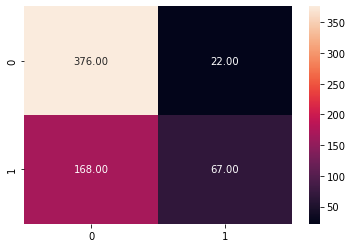

In [347]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))
sns.heatmap(confusion_matrix(y_test,ypred),annot=True,fmt='.2f')

In [322]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred)*100)

62.875197472353875


{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'} 0.613924963924964
The Accuracy of Logistic Regression is :0.6287519747235387
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       398
           1       0.00      0.00      0.00       235

    accuracy                           0.63       633
   macro avg       0.31      0.50      0.39       633
weighted avg       0.40      0.63      0.49       633



<AxesSubplot:>

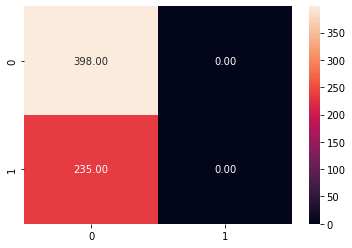

In [323]:
#Applying Logistic Regression using GridSearchCV
# param_grid={
#     'penalty':['l1','l2','elasticnet','none'],
#     'C':[0.1,0.5,1,2,3,4,5,10,100],
#     'max_iter':[100,200,300,500,1000]      
#            }
# grid_lr=GridSearchCV(LogisticRegression(),param_grid,scoring='accuracy',cv=10)
# grid_lr.fit(X_train,y_train)
# print(grid_lr.best_params_,grid_lr.best_score_)
# y_pred_lr=grid_lr.predict(X_test)
# print('The Accuracy of Logistic Regression is :{}'.format(accuracy_score(y_test,y_pred_lr)))
# print(classification_report(y_test,y_pred_lr))
# sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True,fmt='.2f')

In [324]:
res=model.predict([[8.3,214.3,22018.4,8.05,356.8,363.2,18.4,100.3,4.6]])[0]
res

1

In [325]:
res=model.predict([[9.4,145.8,13168.5,9.4,310.58,392.6,8.6,77.5,3.8]])[0]
res

1

# DECISION TREE CLASSIFIER


In [326]:
model1=DecisionTreeClassifier()

In [327]:
model1.fit(X_train,y_train)
ypred=model1.predict(X_test)

[[376  22]
 [168  67]]


<AxesSubplot:>

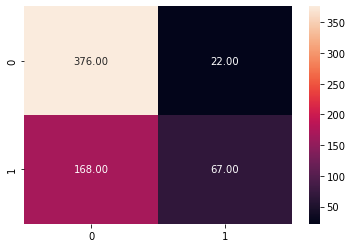

In [348]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))
sns.heatmap(confusion_matrix(y_test,ypred),annot=True,fmt='.2f')

In [329]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred)*100)

59.71563981042654


In [330]:
res=model1.predict([[8.3,214.3,22018.4,8.05,356.8,363.2,18.4,100.3,4.6]])[0]
res

0

In [331]:
res=model1.predict([[9.4,145.8,13168.5,9.4,310.58,392.6,8.6,77.5,3.8]])[0]
res

0

# RANDOM FOREST CLASSIFIER

In [333]:
model2=RandomForestClassifier()

In [334]:
model2.fit(X_train,y_train)
ypred=model2.predict(X_test)

[[376  22]
 [168  67]]


<AxesSubplot:>

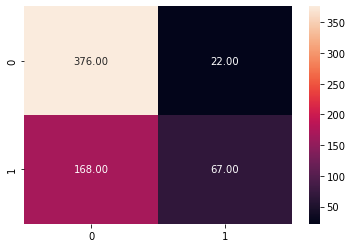

In [349]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))
sns.heatmap(confusion_matrix(y_test,ypred),annot=True,fmt='.2f')

In [336]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred)*100)

68.72037914691943


In [337]:
res=model2.predict([[8.3,214.3,22018.4,8.05,356.8,363.2,18.4,100.3,4.6]])[0]
res

0

In [338]:
res=model2.predict([[9.4,145.8,13168.5,9.4,310.58,392.6,8.6,77.5,3.8]])[0]
res

0

# SVC 

In [339]:
model3=SVC()

In [340]:
model3.fit(X_train,y_train)
ypred=model3.predict(X_test)

[[376  22]
 [168  67]]


<AxesSubplot:>

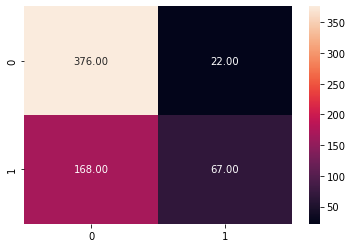

In [350]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))
sns.heatmap(confusion_matrix(y_test,ypred),annot=True,fmt='.2f')

In [342]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred)*100)

69.98420221169036


In [343]:
res=model3.predict([[8.3,214.3,22018.4,8.05,356.8,363.2,18.4,100.3,4.6]])[0]
res

0

In [344]:
res=model3.predict([[9.4,145.8,13168.5,9.4,310.58,392.6,8.6,77.5,3.8]])[0]
res

0

# Evaluating the Models

# Conclusion
* The Support Vector Classifier is giving us the accuracy of 70%.
* The Accuracy is low because the Features are not highly correlated with the Target.
* The Accuracy can be increased by Hyperparameter Tuning.